# Let's use Different Models!

## Object

This notebook is for kagglers who wants to use more models after simple Faste RCNN codes or EfficientDet.  
I will show the another models in this notebook (Cascade Models, Different Backbones, and etc ...) 

I hope you enjoy and don't forget to upvote :D

# Code History
* Ver1, 2 - Start (3/1)  


# Results

Cascade RCNN - Using valdiation dataset
COCO Eval mAP(IoU 0.5)

| Model | 5 epoch  | 10 epoch |
|---:|---:|---:|
|ResNet50| 0.182 | 0.239 |



# Simple Kernel Survey
I tried to catch up previous kernels and summarized like this.  
The whole pipeline for this competetion can be divided into 3 parts.   
If you interested below topics, check the number and references
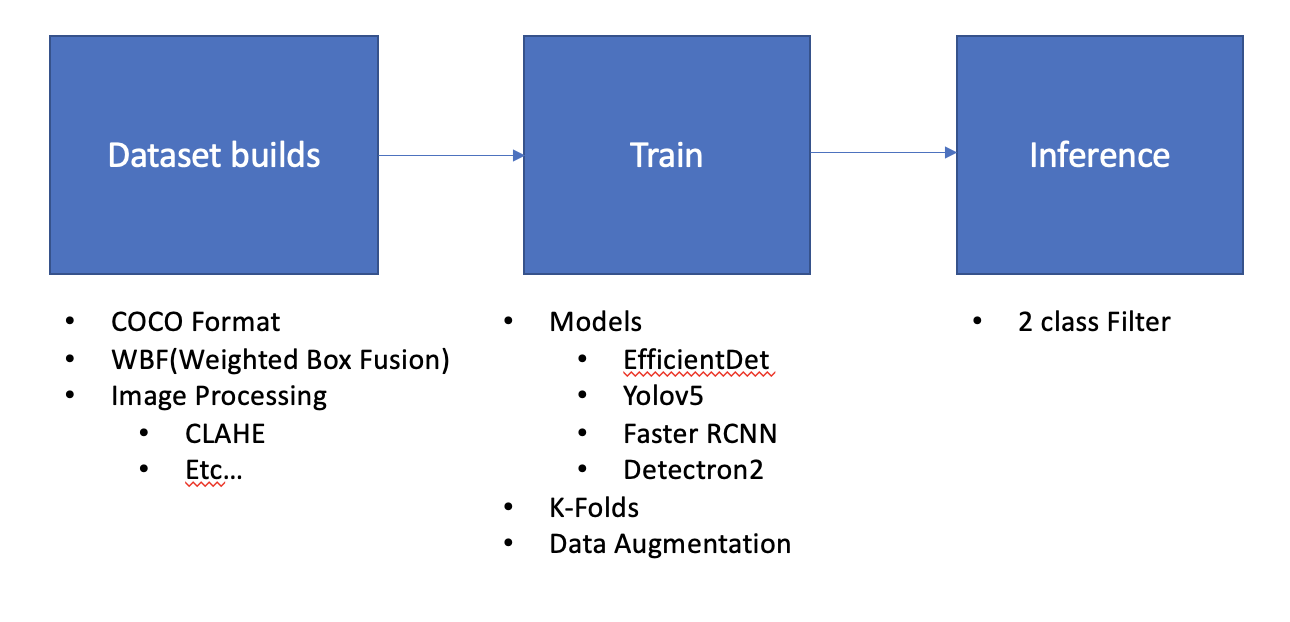


1. Dataset
    * Some kernels tried to use VinbigData to COCO Format - 2)
    * One useful kernel did comparision between Box Fusion techniques and made Dataset - 2)
    * Some kernels tried to use Image Processing techniques and get better results - 3)
    * Some kernels tried to find proper Image Resolution - 12)
2. Train
    * Some kernels use TF EfficientDet modules - 6)
    * YoloV5 - 8)
    * Faster RCNN - 1)
    * Detectron2 - 7)
3. Inference
    * After Inference to reduce the fp, one useful kernel use 2 class filter - 5)
    * Good EDA using YoloV5 - 10, 11)

# Reference
I heavily borrowed the installation and config codes from 1) and used the dataset from 2)  

please upvote below references.

1) [MMDET(pytorch) Framework Training: FasterRCNN Base](https://www.kaggle.com/gauravsingh1/mmdet-pytorch-framework-training-fasterrcnn-base)

2) [VinBigData - Fusing Bboxes + Coco Dataset](https://www.kaggle.com/sreevishnudamodaran/vinbigdata-fusing-bboxes-coco-dataset/#data)

3) [Which X-ray preprocessing performs well?](https://www.kaggle.com/kuuuuub/which-x-ray-preprocessing-performs-well)

4) [x-ray image Enhancement test](https://www.kaggle.com/kuuuuub/x-ray-image-enhancement-test/data)

5) [VinBigData-CXR-AD YOLOv5 14 Class [train]](https://www.kaggle.com/awsaf49/vinbigdata-cxr-ad-yolov5-14-class-train)

6) [⚡VBD EfficientDET TF2 Object Detection API⚡📈](https://www.kaggle.com/sreevishnudamodaran/vbd-efficientdet-tf2-object-detection-api)

7) [📸VinBigData detectron2 train](https://www.kaggle.com/corochann/vinbigdata-detectron2-train)

8) [VinBigData-CXR-AD YOLOv5 14 Class [train]](https://www.kaggle.com/awsaf49/vinbigdata-cxr-ad-yolov5-14-class-train)

9) [VinBigData 🌟2 Class Filter🌟](https://www.kaggle.com/awsaf49/vinbigdata-2-class-filter)

10) [Quick data analysis with YOLOv5 at a glance](https://www.kaggle.com/jamsilkaggle/quick-data-analysis-with-yolov5-at-a-glance)

11) [VinBigData EDA+Infer Analysis with YOLOv5](https://www.kaggle.com/kimse0ha/vinbigdata-eda-infer-analysis-with-yolov5)

12) [256 vs 512 vs 1024? Which dataset is useful?](https://www.kaggle.com/seokhyunseo/256-vs-512-vs-1024-which-dataset-is-useful)

# Install MMDetection

In [ ]:
!pip -qq install mmcv-full

In [ ]:
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip -qq install -e .

# Download Pretrain Model

In [ ]:
# # Pretrain Model Download
# # Cascade
# !mkdir checkpoints
# !wget -c http://download.openmmlab.com/mmdetection/v2.0/cascade_rcnn/cascade_rcnn_r50_caffe_fpn_1x_coco/cascade_rcnn_r50_caffe_fpn_1x_coco_bbox_mAP-0.404_20200504_174853-b857be87.pth -O checkpoints/cascade_rcnn_r50_caffe_fpn_1x_coco_bbox_mAP-0.404_20200504_174853-b857be87.pth

# # RegNet
# !mkdir checkpoints
# !wget -c http://download.openmmlab.com/mmdetection/v2.0/regnet/faster_rcnn_regnetx-3.2GF_fpn_mstrain_3x_coco/faster_rcnn_regnetx-3.2GF_fpn_mstrain_3x_coco_20200520_224253-bf85ae3e.pth

# # VFNet
!mkdir checkpoints
!wget -c https://openmmlab.oss-cn-hangzhou.aliyuncs.com/mmdetection/v2.0/vfnet/vfnet_r50_fpn_mdconv_c3-c5_mstrain_2x_coco/vfnet_r50_fpn_mdconv_c3-c5_mstrain_2x_coco_20201027pth-6879c318.pth


In [ ]:
from mmcv import Config
from mmdet.apis import set_random_seed
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector, init_detector, inference_detector

from IPython.display import clear_output

# Cascade RCNN Setting

In [ ]:
# ## Configuration Setting for Cascade RCNN
# cfg = Config.fromfile('./configs/cascade_rcnn/cascade_rcnn_r50_fpn_1x_coco.py')
# DATASET_TYPE = 'CocoDataset'
# PREFIX = '../../input/vinbigdata-coco-dataset-with-wbf-3x-downscaled/vinbigdata-coco-dataset-with-wbf-3x-downscaled/'
# cfg.dataset_type = DATASET_TYPE
# cfg.classes = ("Aortic_enlargement", "Atelectasis", 
#                "Calcification", "Cardiomegaly", 
#                "Consolidation", "ILD", "Infiltration", 
#                "Lung_Opacity", "Nodule/Mass", "Other_lesion", 
#                "Pleural_effusion", "Pleural_thickening", 
#                "Pneumothorax", "Pulmonary_fibrosis")

# for i in cfg.model.roi_head.bbox_head:
#     i.num_classes = 14

# RegNet (Best) Setting

In [ ]:
# ## Configuration Setting
# cfg = Config.fromfile('./configs/regnet/faster_rcnn_regnetx-3.2GF_fpn_mstrain_3x_coco.py')
# DATASET_TYPE = 'CocoDataset'
# PREFIX = '../../input/vinbigdata-coco-dataset-with-wbf-3x-downscaled/vinbigdata-coco-dataset-with-wbf-3x-downscaled/'
# cfg.dataset_type = DATASET_TYPE
# cfg.classes = ("Aortic_enlargement", "Atelectasis", 
#                "Calcification", "Cardiomegaly", 
#                "Consolidation", "ILD", "Infiltration", 
#                "Lung_Opacity", "Nodule/Mass", "Other_lesion", 
#                "Pleural_effusion", "Pleural_thickening", 
#                "Pneumothorax", "Pulmonary_fibrosis")

# cfg.model.roi_head.bbox_head.num_classes = 14

# VFNet

In [ ]:
## Configuration Setting
cfg = Config.fromfile('./configs/vfnet/vfnet_r50_fpn_mstrain_2x_coco.py')
DATASET_TYPE = 'CocoDataset'
PREFIX = '../../input/vinbigdata-coco-dataset-with-wbf-3x-downscaled/vinbigdata-coco-dataset-with-wbf-3x-downscaled/'
cfg.dataset_type = DATASET_TYPE
cfg.classes = ("Aortic_enlargement", "Atelectasis", 
               "Calcification", "Cardiomegaly", 
               "Consolidation", "ILD", "Infiltration", 
               "Lung_Opacity", "Nodule/Mass", "Other_lesion", 
               "Pleural_effusion", "Pleural_thickening", 
               "Pneumothorax", "Pulmonary_fibrosis")

cfg.model.bbox_head.num_classes = 14

In [ ]:
cfg.data.train.img_prefix = PREFIX
cfg.data.train.classes = cfg.classes
cfg.data.train.ann_file = PREFIX + 'train_annotations.json'
cfg.data.train.type = DATASET_TYPE


cfg.data.val.img_prefix = PREFIX
cfg.data.val.classes = cfg.classes
cfg.data.val.ann_file = PREFIX + 'val_annotations.json'
cfg.data.val.type = DATASET_TYPE



cfg.data.test.img_prefix = PREFIX
cfg.data.test.classes = cfg.classes
cfg.data.test.ann_file = PREFIX + 'val_annotations.json'
cfg.data.test.type = DATASET_TYPE

In [ ]:
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 100

# Change the evaluation metric since we use customized dataset.
cfg.evaluation.metric = 'bbox'
# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 5
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 5

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# we can use here mask_rcnn.
# cfg.load_from = './checkpoints/cascade_rcnn_r50_caffe_fpn_1x_coco_bbox_mAP-0.404_20200504_174853-b857be87.pth'
# cfg.load_from ='faster_rcnn_regnetx-3.2GF_fpn_mstrain_3x_coco_20200520_224253-bf85ae3e.pth'
cfg.load_from = 'vfnet_r50_fpn_mdconv_c3-c5_mstrain_2x_coco_20201027pth-6879c318.pth'
cfg.work_dir = "../vinbig_output"

cfg.runner.max_epochs = 12
cfg.total_epochs = 12

In [ ]:
clear_output()
model = build_detector(cfg.model)
datasets = [build_dataset(cfg.data.train)]

In [ ]:
import torch 


In [ ]:
train_detector(model, datasets[0], cfg, distributed=False, validate=True)

# Inference Validation 

In [ ]:
import os
os.chdir('../')

In [ ]:
!python ./mmdetection/tools/analysis_tools/analyze_logs.py plot_curve ./vinbig_output/None.log.json --keys s2.loss_cls --legend s2.loss_cls --out "loss_cls.jpg"
!rm -rf "./mmdetection"